In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Add predicted clusters to DataFrame
df['Cluster'] = y_dbscan
df['Cluster'].value_counts()

Cluster
 1    78
 0    46
-1    26
Name: count, dtype: int64

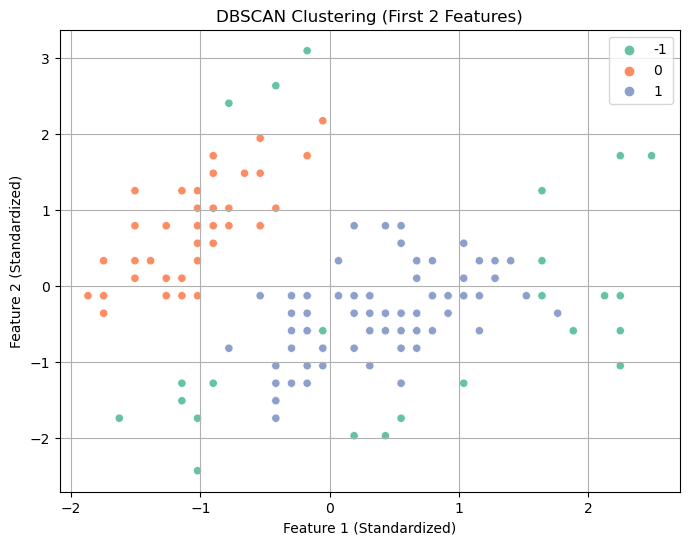

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_dbscan, palette='Set2')
plt.title("DBSCAN Clustering (First 2 Features)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid(True)
plt.show()